In [18]:
import pandas as pd
import numpy as np

In [19]:
df=pd.read_csv('wine_train.csv')

In [20]:
df

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,9.0,0.245,0.38,5.9,0.045,52.0,159.0,0.99500,2.93,0.35,10.2,6
1,8.2,0.420,0.29,4.1,0.030,31.0,100.0,0.99110,3.00,0.32,12.8,7
2,6.4,0.220,0.32,7.2,0.028,15.0,83.0,0.99300,3.13,0.55,10.9,8
3,5.0,0.350,0.25,7.8,0.031,24.0,116.0,0.99241,3.39,0.40,11.3,6
4,7.4,0.300,0.30,5.2,0.053,45.0,163.0,0.99410,3.12,0.45,10.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3668,7.1,0.340,0.32,2.0,0.051,29.0,130.0,0.99354,3.30,0.50,10.4,6
3669,6.4,0.290,0.57,1.0,0.060,15.0,120.0,0.99240,3.06,0.41,9.5,5
3670,8.0,0.260,0.28,8.2,0.038,72.0,202.0,0.99566,3.12,0.56,10.0,6
3671,6.7,0.150,0.29,5.0,0.058,28.0,105.0,0.99460,3.52,0.44,10.2,7


In [21]:
x_train=df.drop(columns=['quality'])
y_train=df['quality']

In [22]:
for i in range(len(y_train)):
    if y_train[i]<6:
        y_train[i]='Bad'
    elif y_train[i]==6:
        y_train[i]='Medium'
    else:
        y_train[i]='Good'

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\HP\anaconda3\lib\site-packages\ipyk

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval=train_test_split(x_train, y_train, test_size=0.3, random_state=42)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8D8B70088>,
      dtype=object)

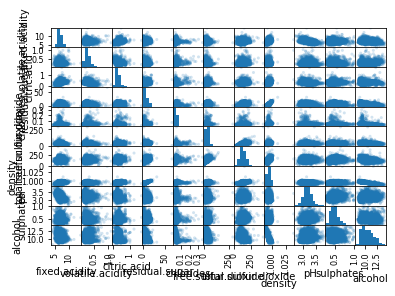

In [24]:
pd.plotting.scatter_matrix(df, alpha=0.2)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
train=scaler.transform(xtrain)

In [31]:
train

array([[-0.05425213, -0.49497409,  0.6631117 , ...,  0.19235166,
        -0.07853939, -1.00883649],
       [ 0.30492958, -0.98736271,  0.42616101, ...,  1.04308203,
         2.58537588, -1.1682152 ],
       [-0.53316108,  2.16392445, -1.3904609 , ...,  0.58499645,
        -1.41049703, -1.24790456],
       ...,
       [ 0.30492958,  1.47458039,  2.16379936, ..., -0.52749712,
        -0.34493092, -1.48697264],
       [ 0.06547511, -0.19954092, -0.20570748, ...,  0.84675964,
         0.01025778,  0.66464004],
       [ 0.66411129,  0.88371404, -0.60062528, ..., -0.39661553,
        -0.25613374, -0.13225355]])

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
a=clf.predict(xtrain)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(ytrain,a)

1.0

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xval)
val=scaler.transform(xval)

In [46]:
b=clf.predict(val)

In [47]:
accuracy_score(yval,b)

0.34936479128856623

In [48]:
from sklearn.linear_model import LogisticRegression
cl=LogisticRegression()
cl.fit(xtrain, ytrain)
b=cl.predict(val)
accuracy_score(yval,b)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.43920145190562615

In [50]:
import xgboost as xgb

In [54]:
D_train = xgb.DMatrix(train, label=ytrain)
D_test = xgb.DMatrix(val, label=yval)
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20 

TypeError: must be real number, not str

In [ ]:
model = xgb.train(param, D_train, steps)

Now using KNN classifier

In [56]:
from sklearn.neighbors import NearestCentroid
clj = NearestCentroid()
clj.fit(train, ytrain)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [57]:
c=clj.predict(val)
accuracy_score(yval,c)

0.4691470054446461